In [1]:
import json
import pandas as pd
import numpy as np
import shutil
import os
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [2]:
#Read json file

data = []
for line in open('photos.json', 'r',encoding="utf-8"):
    data.append(json.loads(line))
data

[{'photo_id': 'zsvj7vloL4L5jhYyPIuVwg',
  'business_id': 'Nk-SJhPlDBkAZvfsADtccA',
  'caption': 'Nice rock artwork everywhere and craploads of taps.',
  'label': 'inside'},
 {'photo_id': 'HCUdRJHHm_e0OCTlZetGLg',
  'business_id': 'yVZtL5MmrpiivyCIrVkGgA',
  'caption': '',
  'label': 'outside'},
 {'photo_id': 'vkr8T0scuJmGVvN2HJelEA',
  'business_id': '_ab50qdWOk0DdB6XOrBitw',
  'caption': 'oyster shooter',
  'label': 'drink'},
 {'photo_id': 'pve7D6NUrafHW3EAORubyw',
  'business_id': 'SZU9c8V2GuREDN5KgyHFJw',
  'caption': 'Shrimp scampi',
  'label': 'food'},
 {'photo_id': 'H52Er-uBg6rNrHcReWTD2w',
  'business_id': 'Gzur0f0XMkrVxIwYJvOt2g',
  'caption': '',
  'label': 'food'},
 {'photo_id': 'wZ29mUm6nKz566j17OBadw',
  'business_id': 'jl38yx7zzMRbg-kOK8NLDw',
  'caption': '',
  'label': 'food'},
 {'photo_id': 'QRUgAISgYLQJ9SK2yOwomw',
  'business_id': '-9NmUeTphyS9Lq1o9MACGw',
  'caption': '',
  'label': 'inside'},
 {'photo_id': 'bb7o8kXXXqc-8PWU6_wcuA',
  'business_id': 'RRCgIohWjaeGtlbp

In [3]:
#Convert to DataFrame
df=DataFrame(data)

In [4]:
#Display last 10 entries
df.tail(10)

,photo_id,business_id,caption,label
200090,7b_bmoxOPPVkjy89KgGlNA,nk2a2nI1jfln9zLpxEvTnw,Jesus Wept,drink
200091,_Rb8erugOe-11P843FBt-A,AGlh4ZDv6jnoiYfz7At9mw,,inside
200092,n8PcPp6Xyr26KwV06c3XNQ,k1WPGl766RE5t42kD60RyQ,Limoncello cake,food
200093,RFxFyGBdbOQ4oj3YuT1MTg,QHWYlmVbLC3K6eglWoHVvA,Looking down from the second level at the coff...,inside
200094,9IvAfkPKUoEyUPn2IuBBGw,imBX5yg4qMLmwgNPxGPveQ,,food
200095,4Zia9NkAfQNjMfcIDhwJ-g,2HxkdqHmbYGj_BH1bLaiSw,#Nektar,food
200096,KB96KRZRhRm8hUkI-OpGEA,_gVyuTRb_6HM-SNtqbpevQ,,inside
200097,Klmojvaf2_2dP1XKzTsFmQ,NUyEOjfAl3HvkpzSpdwqeA,,food
200098,FNEiq7Mogec7t31OaU5juw,hE6YsHHV0fCz_UrGS4o6VA,Drinks by the water!,drink
200099,NHEtLh7APk7Yssjo0h45VA,VIYvcX9SScnqmoI0so1KZA,,food


In [5]:
df['photo_id'].nunique()

200098

In [6]:
df['business_id'].nunique()

36680

In [7]:
#caption and nocaption
df_caption = df[df['caption']!=""]
df_nocaption = df[df['caption']==""]
print("captioned dataset: ",len(df_caption),"\nnot captioned dataset: ",len(df_nocaption))

captioned dataset:  96734 
not captioned dataset:  103366


In [8]:
#Caption list
captioned = df_caption['caption'].tolist()
nocaption = df_nocaption['caption'].tolist()

In [20]:
df_nocaption=df_nocaption[df_nocaption['label']=='food']
df_nocaption

,photo_id,business_id,caption,label
4,H52Er-uBg6rNrHcReWTD2w,Gzur0f0XMkrVxIwYJvOt2g,,food
5,wZ29mUm6nKz566j17OBadw,jl38yx7zzMRbg-kOK8NLDw,,food
15,dxIzVOEowFFsg2RmgFJZdQ,H3WJK0fpoPrIotWqOG_yIA,,food
17,50CbWRa6-tAKRPrq5mbABg,3lW1gubDMpnEIlo45eUKhA,,food
20,K33aWlzEqKjuZFjdEuBOAA,LoyKBRN2Sp3J8AuVqD8Kug,,food
...,...,...,...,...
200085,a_r5E10Z-8vik3nfT3kbSg,hVNm1dAA-ZzJp-UFaZ8YNA,,food
200086,ZOjLjWZre4JuFvR_LcuerQ,grVoVN3n0M7IV1jRUiHWHQ,,food
200094,9IvAfkPKUoEyUPn2IuBBGw,imBX5yg4qMLmwgNPxGPveQ,,food
200097,Klmojvaf2_2dP1XKzTsFmQ,NUyEOjfAl3HvkpzSpdwqeA,,food


In [21]:
# df_nocaption.to_csv('test_uncaptioned.csv')

In [9]:
#Look over the captions
captioned[0:5]

['Nice rock artwork everywhere and craploads of taps.',
 'oyster shooter',
 'Shrimp scampi',
 'Inside reception',
 'Small portion of the back patio']

In [10]:
#caption dataframe
Caption_df=df_caption['caption']
Caption_df

0         Nice rock artwork everywhere and craploads of ...
2                                            oyster shooter
3                                             Shrimp scampi
9                                          Inside reception
10                          Small portion of the back patio
                                ...                        
200090                                           Jesus Wept
200092                                      Limoncello cake
200093    Looking down from the second level at the coff...
200095                                              #Nektar
200098                                 Drinks by the water!
Name: caption, Length: 96734, dtype: object

In [11]:
# np.savetxt(r'captiontext.txt', Caption_df.values, fmt='%s', delimiter='\t',encoding="utf-8")

In [33]:
folder='dataset/'
file= 'captiontext.txt'
with open(os.path.join(folder, file),'w',encoding="utf-8") as outfile:
    Caption_df.to_string(outfile)

In [12]:
print("Data set has {} observations with caption.".format(len(captioned)))
print("Data set has {} observations without caption.".format(len(nocaption)))

Data set has 96734 observations with caption.
Data set has 103366 observations without caption.


In [13]:
categories=['drink','food','inside','menu','outside']
df.label.value_counts()

food       108152
inside      56031
outside     18569
drink       15670
menu         1678
Name: label, dtype: int64

food       55331
inside     24662
outside     8287
drink       7547
menu         907
Name: label, dtype: int64


C:\Users\hetul\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


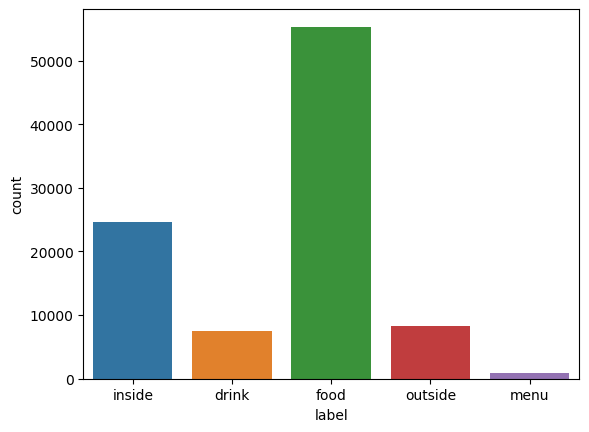

In [14]:
print(df_caption.label.value_counts())
sns.countplot(df_caption.label)
plt.show()

food       52821
inside     31369
outside    10282
drink       8123
menu         771
Name: label, dtype: int64


C:\Users\hetul\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


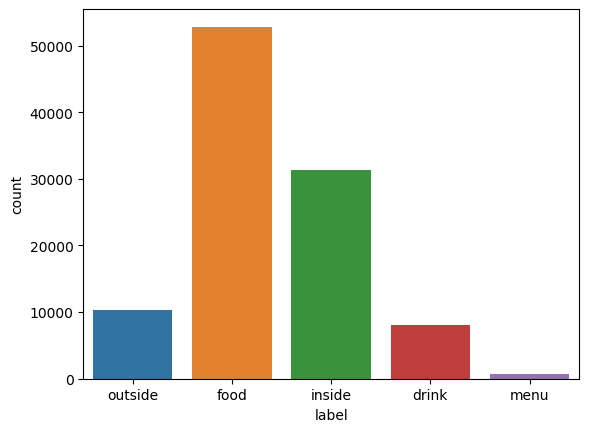

In [15]:
print(df_nocaption.label.value_counts())
sns.countplot(df_nocaption.label)
plt.show()

In [16]:
df

,photo_id,business_id,caption,label
0,zsvj7vloL4L5jhYyPIuVwg,Nk-SJhPlDBkAZvfsADtccA,Nice rock artwork everywhere and craploads of ...,inside
1,HCUdRJHHm_e0OCTlZetGLg,yVZtL5MmrpiivyCIrVkGgA,,outside
2,vkr8T0scuJmGVvN2HJelEA,_ab50qdWOk0DdB6XOrBitw,oyster shooter,drink
3,pve7D6NUrafHW3EAORubyw,SZU9c8V2GuREDN5KgyHFJw,Shrimp scampi,food
4,H52Er-uBg6rNrHcReWTD2w,Gzur0f0XMkrVxIwYJvOt2g,,food
...,...,...,...,...
200095,4Zia9NkAfQNjMfcIDhwJ-g,2HxkdqHmbYGj_BH1bLaiSw,#Nektar,food
200096,KB96KRZRhRm8hUkI-OpGEA,_gVyuTRb_6HM-SNtqbpevQ,,inside
200097,Klmojvaf2_2dP1XKzTsFmQ,NUyEOjfAl3HvkpzSpdwqeA,,food
200098,FNEiq7Mogec7t31OaU5juw,hE6YsHHV0fCz_UrGS4o6VA,Drinks by the water!,drink


Populating the interactive namespace from numpy and matplotlib


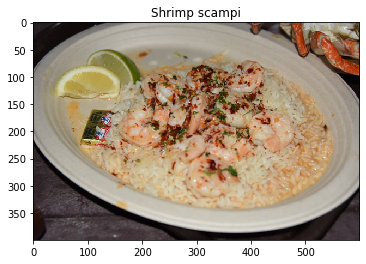

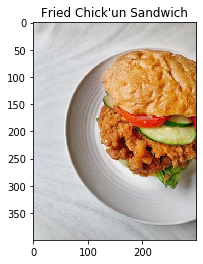

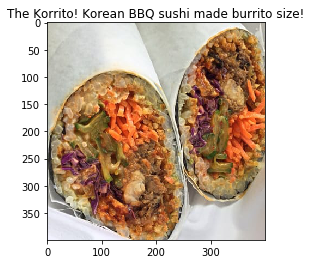

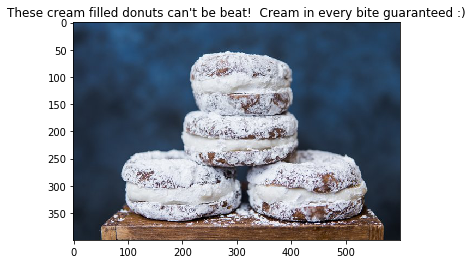

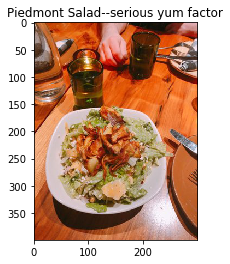

In [17]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
r=df_caption.loc[df_caption['label']=='food']
for i in range(0,5):
    img = mpimg.imread('photos/'+r.photo_id.iloc[i]+'.jpg')
    imgplot = plt.imshow(img)
    plt.title(r.caption.iloc[i])
    plt.show()

In [18]:
df_caption['number_of_words'] = df_caption.caption.apply(lambda x: len(x.split()))
df_caption

C:\Users\hetul\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,photo_id,business_id,caption,label,number_of_words
0,zsvj7vloL4L5jhYyPIuVwg,Nk-SJhPlDBkAZvfsADtccA,Nice rock artwork everywhere and craploads of ...,inside,8
2,vkr8T0scuJmGVvN2HJelEA,_ab50qdWOk0DdB6XOrBitw,oyster shooter,drink,2
3,pve7D6NUrafHW3EAORubyw,SZU9c8V2GuREDN5KgyHFJw,Shrimp scampi,food,2
9,3ROd5PAQ_0OkmoKWVO06ag,u9vhzYtXpfyvAOAMnyy-Cw,Inside reception,inside,2
10,foJzmWwl8WlC3xi-QQDRgg,4OLfgjPToHrYf4HKXvlU2g,Small portion of the back patio,outside,6
...,...,...,...,...,...
200090,7b_bmoxOPPVkjy89KgGlNA,nk2a2nI1jfln9zLpxEvTnw,Jesus Wept,drink,2
200092,n8PcPp6Xyr26KwV06c3XNQ,k1WPGl766RE5t42kD60RyQ,Limoncello cake,food,2
200093,RFxFyGBdbOQ4oj3YuT1MTg,QHWYlmVbLC3K6eglWoHVvA,Looking down from the second level at the coff...,inside,11
200095,4Zia9NkAfQNjMfcIDhwJ-g,2HxkdqHmbYGj_BH1bLaiSw,#Nektar,food,1


In [51]:
import spacy as sp
from collections import Counter
sp.prefer_gpu()
import en_core_web_sm
#anconda prompt ko run as adminstrator and copy paste this:python -m spacy download en
nlp = en_core_web_sm.load()
import re
def clean_text(doc):
    '''
    Clean the document. Remove pronouns, stopwords, lemmatize the words and lowercase them
    '''
    doc = nlp(doc)
    tokens = []
    exclusion_list = ["nan"]
    for token in doc:
        if token.is_stop or token.is_punct or token.text.isnumeric() or (token.text.isalnum()==False) or token.text in exclusion_list :
            continue
        token = str(token.lemma_.lower().strip())
        tokens.append(token)
    return " ".join(tokens) 

In [52]:
df_caption["cleaned_caption"]  = df.apply(lambda row: clean_text(row["caption"]) ,axis=1)
df_caption

C:\Users\hetul\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,photo_id,business_id,caption,label,number_of_words,cleaned_caption
0,zsvj7vloL4L5jhYyPIuVwg,Nk-SJhPlDBkAZvfsADtccA,Nice rock artwork everywhere and craploads of ...,inside,8,nice rock artwork crapload tap
2,vkr8T0scuJmGVvN2HJelEA,_ab50qdWOk0DdB6XOrBitw,oyster shooter,drink,2,oyster shooter
3,pve7D6NUrafHW3EAORubyw,SZU9c8V2GuREDN5KgyHFJw,Shrimp scampi,food,2,shrimp scampi
9,3ROd5PAQ_0OkmoKWVO06ag,u9vhzYtXpfyvAOAMnyy-Cw,Inside reception,inside,2,inside reception
10,foJzmWwl8WlC3xi-QQDRgg,4OLfgjPToHrYf4HKXvlU2g,Small portion of the back patio,outside,6,small portion patio
...,...,...,...,...,...,...
200090,7b_bmoxOPPVkjy89KgGlNA,nk2a2nI1jfln9zLpxEvTnw,Jesus Wept,drink,2,jesus wept
200092,n8PcPp6Xyr26KwV06c3XNQ,k1WPGl766RE5t42kD60RyQ,Limoncello cake,food,2,limoncello cake
200093,RFxFyGBdbOQ4oj3YuT1MTg,QHWYlmVbLC3K6eglWoHVvA,Looking down from the second level at the coff...,inside,11,look second level coffee sweet bar
200095,4Zia9NkAfQNjMfcIDhwJ-g,2HxkdqHmbYGj_BH1bLaiSw,#Nektar,food,1,nektar


In [53]:
df_caption.to_csv('captioneddata.csv')

In [54]:
df1=df_caption[df_caption.cleaned_caption.map(lambda x: x.isascii())]
df1

,photo_id,business_id,caption,label,number_of_words,cleaned_caption
0,zsvj7vloL4L5jhYyPIuVwg,Nk-SJhPlDBkAZvfsADtccA,Nice rock artwork everywhere and craploads of ...,inside,8,nice rock artwork crapload tap
2,vkr8T0scuJmGVvN2HJelEA,_ab50qdWOk0DdB6XOrBitw,oyster shooter,drink,2,oyster shooter
3,pve7D6NUrafHW3EAORubyw,SZU9c8V2GuREDN5KgyHFJw,Shrimp scampi,food,2,shrimp scampi
9,3ROd5PAQ_0OkmoKWVO06ag,u9vhzYtXpfyvAOAMnyy-Cw,Inside reception,inside,2,inside reception
10,foJzmWwl8WlC3xi-QQDRgg,4OLfgjPToHrYf4HKXvlU2g,Small portion of the back patio,outside,6,small portion patio
...,...,...,...,...,...,...
200090,7b_bmoxOPPVkjy89KgGlNA,nk2a2nI1jfln9zLpxEvTnw,Jesus Wept,drink,2,jesus wept
200092,n8PcPp6Xyr26KwV06c3XNQ,k1WPGl766RE5t42kD60RyQ,Limoncello cake,food,2,limoncello cake
200093,RFxFyGBdbOQ4oj3YuT1MTg,QHWYlmVbLC3K6eglWoHVvA,Looking down from the second level at the coff...,inside,11,look second level coffee sweet bar
200095,4Zia9NkAfQNjMfcIDhwJ-g,2HxkdqHmbYGj_BH1bLaiSw,#Nektar,food,1,nektar


In [55]:
df1.to_csv('captioneddata_final.csv')